### exercise 2 classification 
### nearest neighbor and QDA on the Digits data set 

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
digits = datasets.load_digits()
print(type(digits))
print(digits.images.shape)

<class 'sklearn.utils.Bunch'>
(1797, 8, 8)


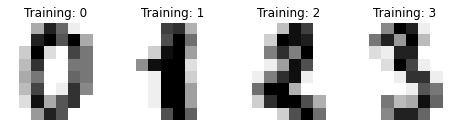

In [3]:
figure = plt.figure(figsize=(8, 4))

images_and_labels = list(zip(digits.images, digits.target))

i = 1

for (image, label) in images_and_labels[:4]:
    ax = plt.subplot(1, 4, i)
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Training: %i' % label)
    i+=1

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 64)


In [5]:
classifier=KNeighborsClassifier(3)
#classifier=QuadraticDiscriminantAnalysis()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

In [7]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
predicted = classifier.predict(X_test)

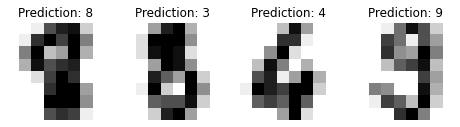

In [9]:
figure = plt.figure(figsize=(8, 4))

i = 1
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted)) # // nach unten 
for (image, prediction) in images_and_predictions[:4]:
    ax = plt.subplot(1, 4, i)
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Prediction: %i' % prediction)
    i+=1

In [10]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

# Precision: Positive predictive value (#True positive predictions / #True positive predictions + #False positive predictions)
 
# Recall: True positive rate (#true positive predictions / #True positive predictions + #False negative predictions)

# F1-score: 2/ ( 1/recall + 1/precision)

# Support: how many times tha number is in the data set

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.99      0.98        91
           2       0.99      0.94      0.96        86
           3       0.91      0.92      0.92        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.98      1.00      0.99        89
           8       0.94      0.95      0.95        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




C:\Users\Chijun Zhang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


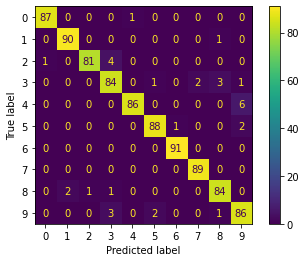

In [11]:
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)

In [12]:
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  0 84  0  1  0  2  3  1]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  2  1  1  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]
